## Project 2: Sociology, History, and Linguistics

### Lesson Goals
- Learn how to read in text data
- Work with libraries to make the coding process easier
- Use basic natural language processing (NLP) to extract key information from texts

### Final Product
- Graph the frequency of common phrases (bigrams) within our selected text

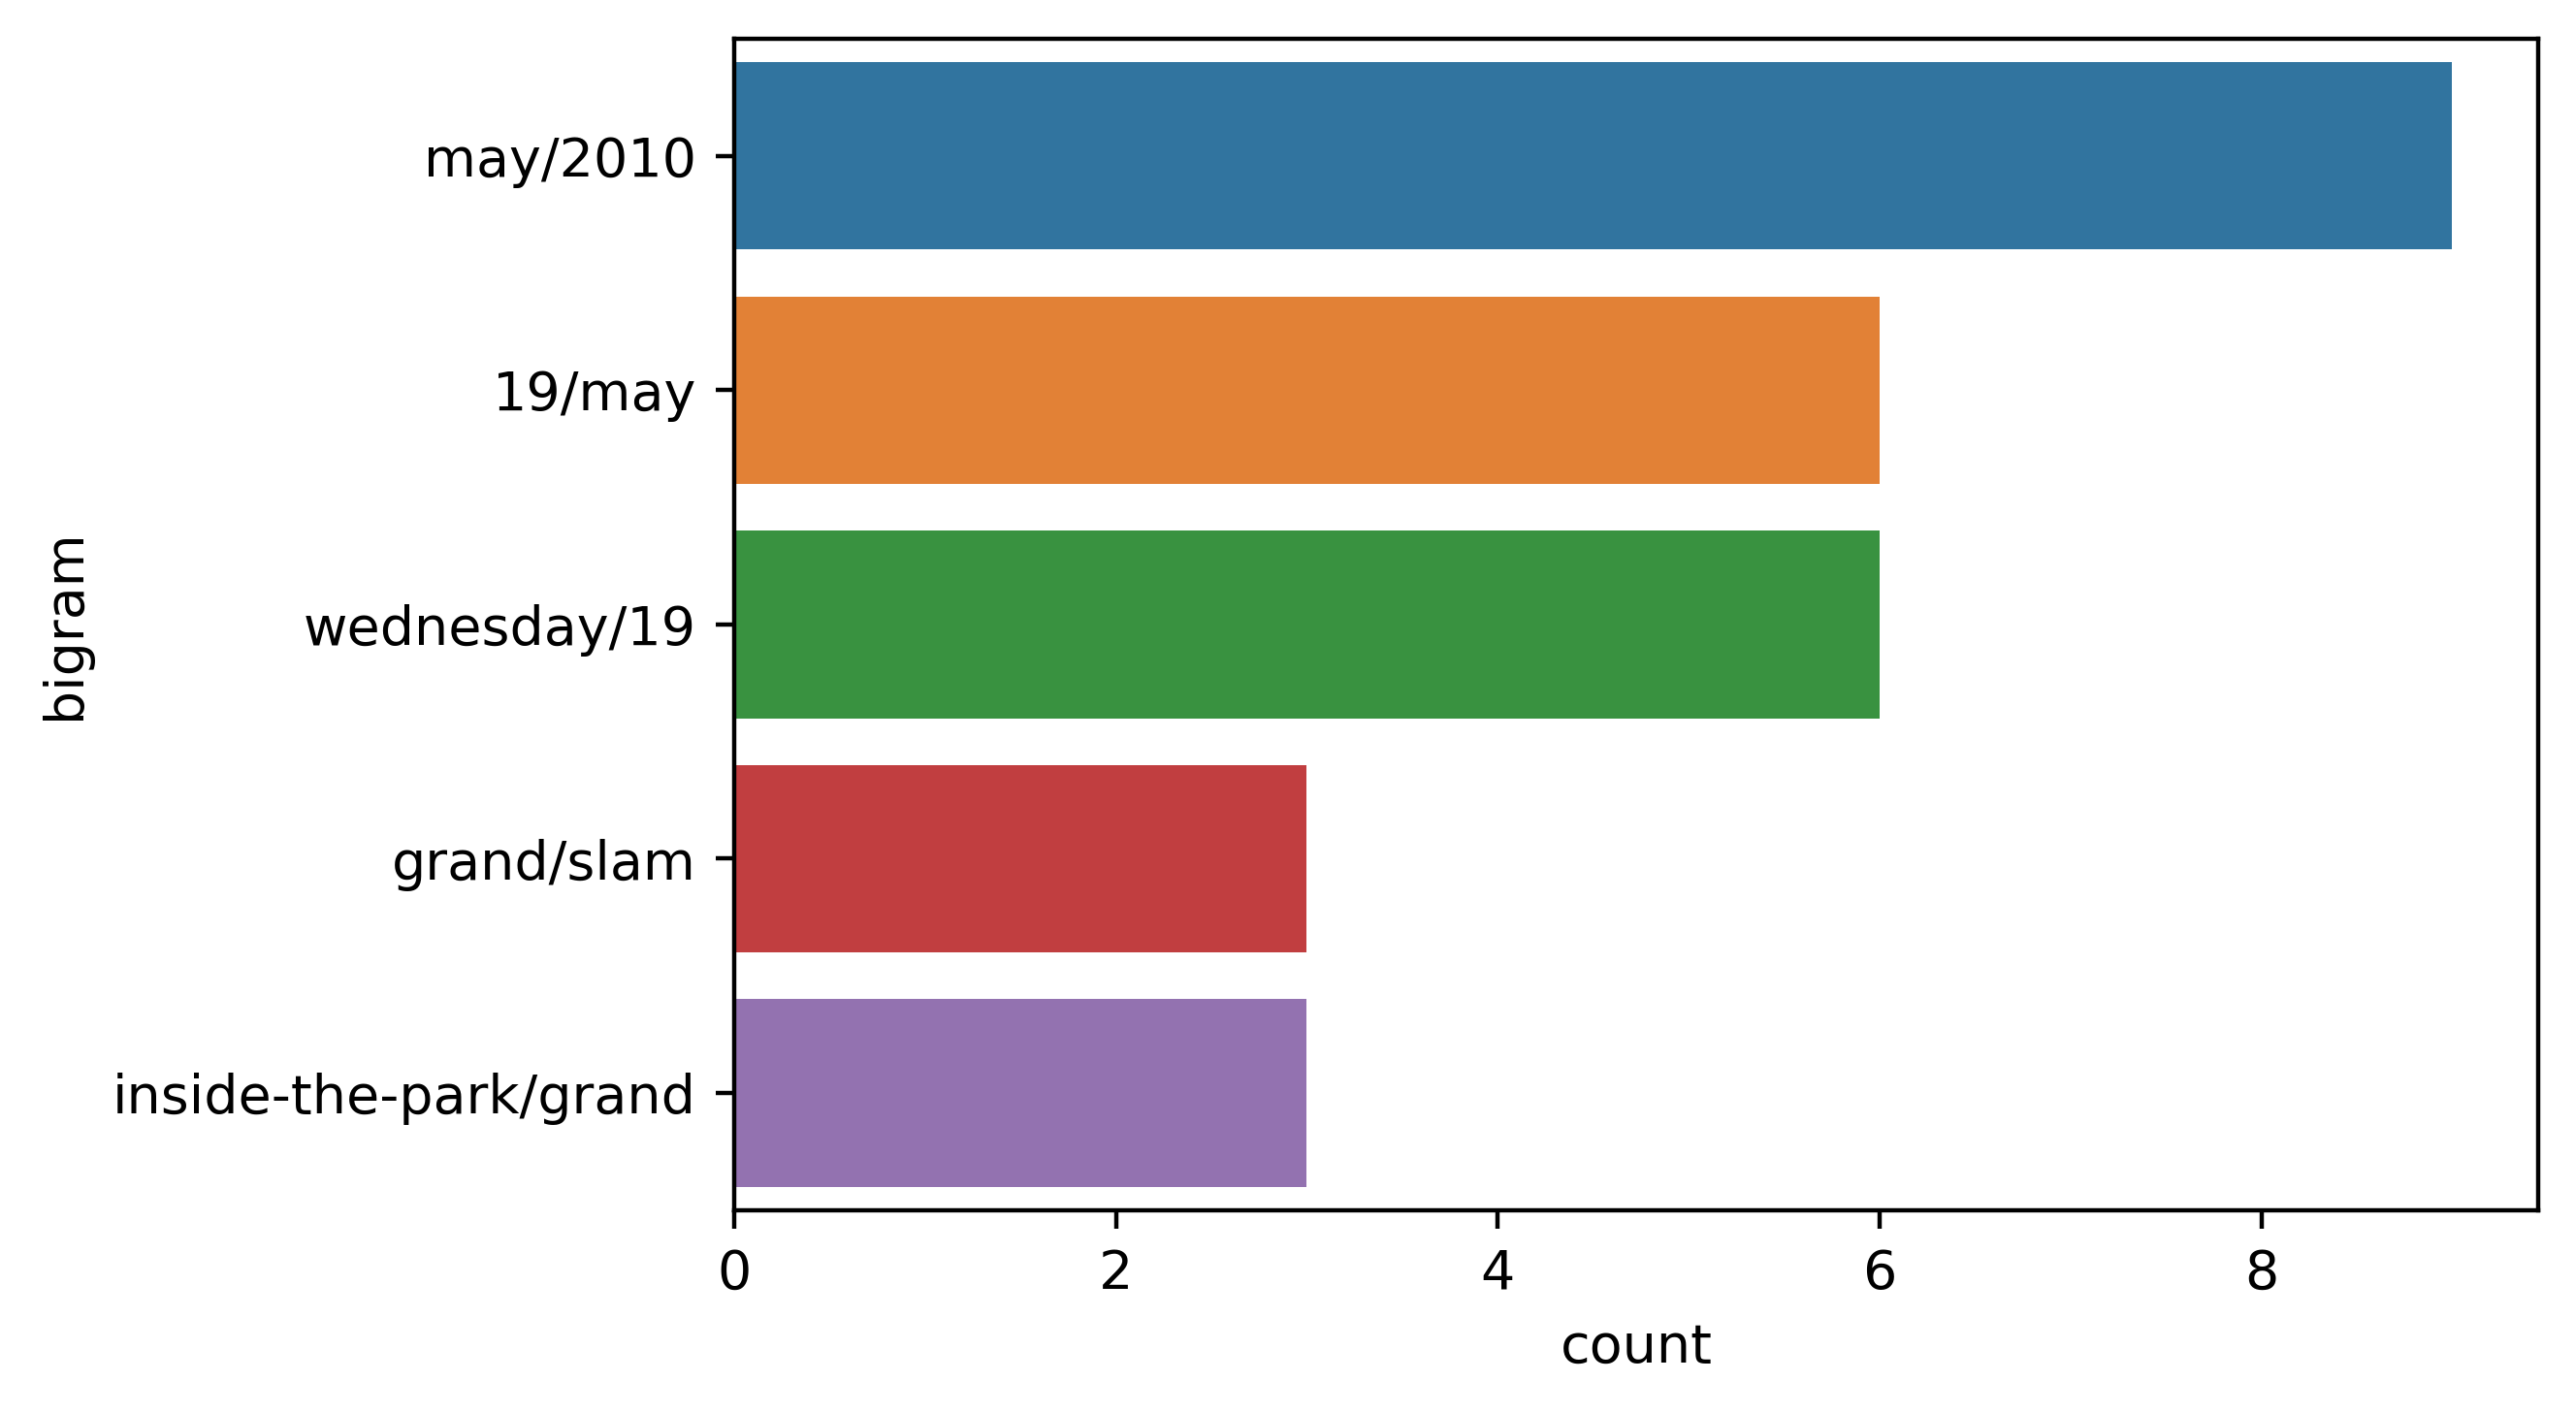

### Libraries
One of the strongest elements of python as a programming language is its libraries. 

Many utility libraries come with base python, but the real power comes in user-created libraries. You'll see that I have included a number of libraries, which will help to greatly simplify our code.

In general, import statements follow the format `import LIBRARY`. You can also `import LIBRARY as NAME` to have a more concise way of referencing the imported library. Finally, you can `from LIBRARY import ELEMENT` to bring in a particular function or object.

In [ ]:
#this is a data manipulation library centered around the Data Frame, which stores two-dimensional data in a tabular format 
#and makes certain operations easier to carry out
import pandas as pd

#these are different elements from NLTK (Natural Language Toolkit), a massive natural language processing library
#  we are importing individual elements: it's much cleaner to onlly bring in what we need
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk.collocations
from nltk import bigrams

#these are utility libraries; they contain useful data structures, collections, or functions 
#that will make our code more simple
from string import punctuation
from collections import Counter
import glob
import csv

#these are a couple of plotting libraries, which we'll use at the very end of the exercise
import matplotlib.pyplot as plt
import seaborn as sns

You can find added description of the different functions and objects that we will be using at:
- [NLTK](http://www.nltk.org/=)
- [glob](https://docs.python.org/3/library/glob.html)
- [pandas](https://pandas.pydata.org/docs/)
- [string](https://docs.python.org/2/library/string.html#string.punctuation)
- [collections](https://docs.python.org/2/library/collections.html#collections.Counter)
- [seaborn](https://seaborn.pydata.org/#)

### Additional elements
These are things that we will use later in the exercise... you don't have to worry about them right now! 

In [ ]:
#a wrapper function that turns frequencies into counts
#  don't worry about this!
def get_bigram_count(blog_tokens, n = 5):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    
    bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(blog_tokens)
    bigram_finder.apply_freq_filter(3)

    freq_n = bigram_finder.score_ngrams(bigram_measures.raw_freq)[0 : n]

    num_bigrams = len([x for x in nltk.bigrams(blog_tokens)])

    for i in range(len(freq_n)):
        new_tup = (freq_n[i][0], round(freq_n[i][1] * num_bigrams))
        freq_n[i] = new_tup

    return freq_n

In [ ]:
#these are additional stopwords for use later... don't worry about this right now!
ADD_STOPS = [p for p in punctuation] + ["''", '""', "``", '`', '...', '’', "'s", "n't"]

### Reading in the Text Files
Before we do any anlaysis, we have to bring in the text files that we would like to analyze.

In [ ]:
#checking that all of the desired files exist in the environment and are detected by Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#get all the text files in the directory
#  we're looking for .txt files, but we don't care what their name is so we use "*" as a sort of "wildcard"
file_names = glob.glob('/kaggle/input/text-files/*.txt')

In [ ]:
#taking a look at the files that we matched with our pattern
#  these are filepaths; they are the instructions for arriving at a certain file, interpreted by the computer
print(file_names)

In [ ]:
#creating a list to read all of the text into
file_strs = []

#going one by one, inserting the text from each file into the list as a string
for fp in file_names:
    with open(fp, 'r') as file:
        file_strs.append(file.read())
        
#how many files did we get?        
print(len(file_strs))

In [ ]:
#taking a look at one of the blogs in our list
#  in "file_strs[0][0 : 500]", "[0]" gets the first blog and the "[0 : 500]" gets the first 500 characters
print(file_strs[0][0 : 500])

In [ ]:
#putting all of the files together into one string
all_blogs = '\n'.join(file_strs)

### PAUSE: questions?

### Preprocessing
Preprocessing is a vital step in natural langauge processing. It ensures that our text data is in the optimal format before being sent along to analysis.

**Tokenization:** when we tokenize, we input in a string and receive a list of tokens as output. Tokens can be thought of as our base unit of analysis and are generally words.

In [ ]:
#notice how tokens can be punctuation and that words like "don't" get split into "do" and "n't"
string_a = 'Hello there, how are you today? I am doing fine. Don\'t get caught in the rain!'
print(word_tokenize(string_a))

**Normalizing Case:** we'd like for the words "Hello" and "hello" to be considered the same word. By default, they are different, so we will force all characters to lowercase in our preprocessing step.

In [ ]:
string_b = 'Hello'
string_c = 'hello'
print(string_b == string_c) #they're considered different
print(string_b.lower() == string_c.lower()) #now they're the same!

**Removing Stopwords:** stopwords are words that are extremely common and aren't particularly indicative of a certain document or text. There are many ways to deal with stopwords, but the most simple method is to just remove them from our collection of tokens.

In [ ]:
#taking a look at the first few stopwords from NLTK's stopword list
stopwords.words('english')[0 : 10]

Now that we understand each component of the preprocessing, we'll put each element into one tidy function.

In [ ]:
def preprocess_text(text_str, stopwords):
    str_lower = text_str.lower() #normalizing case
    str_tokens = word_tokenize(str_lower) #tokenizing
    
    final_tokens = [] #the list to hold non-stopword tokens
    for token in str_tokens:
        if token not in stops: #only keep the token if it's not a stopword
            final_tokens.append(token)
            
    return final_tokens #pass back out the object to be used by the main script

In [ ]:
#normalize case, tokenize, and remove stopwords/punctuation
stops = stopwords.words('english') + ADD_STOPS #our ADD_STOPS stopwords include punctuation and a little bit more

#a list to hold all of our tokens for each text file
each_blog_tokens = []

for i in range(len(file_strs)):
    processed_blog = preprocess_text(file_strs[i], stops)
    
    each_blog_tokens.append(processed_blog) #adding our final list of tokens to "each_blog_tokens"

In [ ]:
#seeing how we did with tokenization
print(each_blog_tokens[0][0 : 50])

In [ ]:
#"all_blog_tokens" stores each blogs' tokens in one list whereas "each_blog_tokens" stores each blogs' tokens in seperate lists
all_blog_tokens = preprocess_text(all_blogs, stops)

print(len(all_blog_tokens)) #the total amount of tokens in all blogs

### PAUSE: questions?

### Simple Analysis
Anlaysis in natural language processing can range from relatively simple counting methods all the way to complex machine learning algorithms. We're going to keep it simple here, looking only at counts for unigrams and bigrams.

**What is a unigram?** Unigrams are single tokens. In the sentence _"this is a sentence,"_ the unigrams would be _"this," "is," "a,"_ and _"sentence."_ 

**What is a bigram?** Bigrams are quite similar to unigrams, instead counting two-token pairs (makes sense--"bi" instead of "uni"). In the same sentence, the bigrams are _"this is," "is a,"_ and _"a sentence."_

In [ ]:
#looking at the most frequent unigrams
most_common = []

#getting the ten most frequent for each text
for blog in each_blog_tokens:
    freq_dict = Counter(blog).most_common(10) #takes the list of tokens and returns a dictionary listing the frequency of each unique token
    most_common.append(freq_dict) #adding it to our list

In [ ]:
#seeing what the result is for the first blog post is
print(most_common[0])

In [ ]:
#getting the ten most frequent unigrams across ALL texts
freq_dict_all = Counter(all_blog_tokens).most_common(10)

print(freq_dict_all)

**Bigram Association vs. Frequency:** in just a moment, we'll look at two possible scoring metrics for bigrams, association and frequency. The key difference lies in how importance is defined. 

While frequency looks simply for bigrams with high counts, association applies probability to measure importance. In particular, we will use pointwise mutual information (PMI) to compute association between tokens for each bigram. PMI will de-emphasize tokens that occur frequently and simply happen to co-occur, instead focusing on tokens that truly tend to co-occur at a significantly increased rate.

An issue with PMI is its tendency to reward bigrams containing rare tokens. To combat this problem, we will exlcude bigrams that occur less than three times.

In [ ]:
#looking at the most frequent and most associated bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures() #these will help us score the bigrams

most_associated = []
most_freq = []

#extracting and scoring the bigrams for all texts
for blog in each_blog_tokens:
    bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(blog) #building a bigram finder 
    bigram_finder.apply_freq_filter(3) #removing bigrams occuring less than three times

    #scoring bigrams by PMI
    assoc_five = bigram_finder.score_ngrams(bigram_measures.pmi)[0 : 5]
    for i in range(len(assoc_five)): #rounding each bigram's association to three decimal places
        assoc_five[i] = (assoc_five[i][0], round(assoc_five[i][1], 3))
    most_associated.append(assoc_five)
    
    #scoring bigrams by raw count
    freq_five = get_bigram_count(blog)
    most_freq.append(freq_five)

In [ ]:
#looking at the result for the most frequent bigrams in the first blog post
print(most_freq[0])

In [ ]:
#looking at the result for the most associated bigrams in the first blog post, by PMI
print(most_associated[0])

### PAUSE: questions?

### Saving Results
Finally, we'll save results in a comma-seperated values (CSV) file. CSV files are simply text files that have each cell in a two-dimensional table seperated by a comma. Excel and Google Sheets can read and interpret files of this type.

We're trying to make a file that looks like the following table, where the **header** consists of "bigram" and "PMI_score" and each **row** is a single observation:

|bigram       |PMI_score |blog_name|
|-------------|----------|---------| 
|wordA/wordB  |pmi1      |nameA    |
|wordC/wordD  |pmi2      |nameB    |

This would be represented in CSV format as "bigram,PMI_score,blog_name\nwordA/wordB,pmi1,nameA\nwordC/wordD,pmi2,nameB," where "\n" is a newline character.

In [ ]:
#the header for each file
header_assoc = ['bigram', 'PMI_score', 'blog_name']
header_freq = ['bigram', 'count', 'blog_name']

#the rows for each file, which must still be populated
rows_assoc = []
rows_freq = []

ct = 0 #keeping count of where we are within the individual blogs
for blog in most_associated:
    for bigram in blog: #looking at each of the most associated bigrams
        bigram_str = bigram[0][0] + '/' + bigram[0][1] #building a string to represent the bigram
        blog_name = file_names[ct].split('/')[-1][0 : -4] #adding in the blog name as included in the original filepath
        rows_assoc.append([bigram_str, bigram[1], blog_name]) #adding in each element 
    ct += 1
    
#the same process as before, but for the most frequent bigrams
ct = 0
for blog in most_freq:
    for bigram in blog:
        bigram_str = bigram[0][0] + '/' + bigram[0][1]
        blog_name = file_names[ct].split('/')[-1][0 : -4]
        rows_freq.append([bigram_str, bigram[1], blog_name])
    ct += 1

In [ ]:
#writing to the files
with open('most_associated.csv', 'w') as file: #opening a connection
    csvwriter = csv.writer(file) #building a csvwriter object to format our header and rows correctly
    
    csvwriter.writerow(header_assoc) #adding the header
    csvwriter.writerows(rows_assoc) #adding all of the rows
    
#the same proces as before, but for the most frequent bigrams    
with open('most_frequent.csv', 'w') as file:
    csvwriter = csv.writer(file)
    
    csvwriter.writerow(header_freq)
    csvwriter.writerows(rows_freq)

### Making a Nice Plot

We can make a very simple plot using `seaborn` and `matplotlib.pyplot` libraries and the results of our analysis. While very basic, it's definitely nice to have a visual representation of our results.

In [ ]:
most_freq_df = pd.read_csv('./most_frequent.csv') #reading in the data

#dataframes are displayed nicely by Kaggle as long as you don't use "print()"!
most_freq_df.head() #looking at the first few values

In [ ]:
#grabbing just the observations that correspond to the blog "Acephalous-Internet"
aceph = most_freq_df[most_freq_df["blog_name"] == "Acephalous-Internet"] 

aceph #seeing what we're working with

In [ ]:
#making a barplot using seaborn - we could do this for any of the blogs!
sns.barplot(data = aceph, y = "bigram", x = "count")

plt.savefig("img.png", bbox_inches = 'tight', dpi = 400) #saving the plot